[View in Colaboratory](https://colab.research.google.com/github/mhyr/Texture-Dataset/blob/master/Copy_of_cyclegan.ipynb)

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
!pip install scipy
!pip install panda
!pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl && pip install torchvision
!pip install fastai

## Cyclegan

In [0]:
from fastai.conv_learner import *
from fastai.dataset import *

In [0]:
from cgan.options.train_options import *

In [64]:
opt = TrainOptions().parse(['--dataroot', '/data0/datasets/cyclegan/horse2zebra', '--nThreads', '8', '--no_dropout',
                           '--niter', '100', '--niter_decay', '100', '--name', 'nodrop', '--gpu_ids', '2'])

RuntimeError: ignored

In [0]:
from cgan.options.train_options import TrainOptions
from cgan.data.data_loader import CreateDataLoader
from cgan.models.models import create_model

In [2]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)
dataset_size

NameError: ignored

In [0]:
model = create_model(opt)

cycle_gan
initialization method [normal]
initialization method [normal]
initialization method [normal]
initialization method [normal]
---------- Networks initialized -------------
ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False)
    (3): ReLU(inplace)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
    (6): ReLU(inplace)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
    (9): ReLU(inplace)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
        (3): ReLU(inpla

In [0]:
# opt.niter=9
# opt.niter_decay=1

In [0]:
total_steps = 0

for epoch in range(opt.epoch_count, opt.niter + opt.niter_decay + 1):
    epoch_start_time = time.time()
    iter_data_time = time.time()
    epoch_iter = 0

    for i, data in tqdm(enumerate(dataset)):
        iter_start_time = time.time()
        if total_steps % opt.print_freq == 0: t_data = iter_start_time - iter_data_time
        total_steps += opt.batchSize
        epoch_iter += opt.batchSize
        model.set_input(data)
        model.optimize_parameters()

        if total_steps % opt.display_freq == 0:
            save_result = total_steps % opt.update_html_freq == 0

        if total_steps % opt.print_freq == 0:
            errors = model.get_current_errors()
            t = (time.time() - iter_start_time) / opt.batchSize

        if total_steps % opt.save_latest_freq == 0:
            print('saving the latest model (epoch %d, total_steps %d)' % (epoch, total_steps))
            model.save('latest')

        iter_data_time = time.time()
    if epoch % opt.save_epoch_freq == 0:
        print('saving the model at the end of epoch %d, iters %d' % (epoch, total_steps))
        model.save('latest')
        model.save(epoch)

    print('End of epoch %d / %d \t Time Taken: %d sec' %
          (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))
    model.update_learning_rate()

1334it [09:06,  2.44it/s]
End of epoch 1 / 200 	 Time Taken: 546 sec
learning rate = 0.0002000
1334it [09:06,  2.44it/s]
End of epoch 2 / 200 	 Time Taken: 546 sec
learning rate = 0.0002000
1334it [09:08,  2.43it/s]
End of epoch 3 / 200 	 Time Taken: 548 sec
learning rate = 0.0002000
997it [06:47,  2.44it/s]saving the latest model (epoch 4, total_steps 5000)
1334it [09:06,  2.44it/s]
End of epoch 4 / 200 	 Time Taken: 546 sec
learning rate = 0.0002000
1334it [09:09,  2.43it/s]
saving the model at the end of epoch 5, iters 6670
End of epoch 5 / 200 	 Time Taken: 550 sec
learning rate = 0.0002000
1334it [09:12,  2.41it/s]
End of epoch 6 / 200 	 Time Taken: 552 sec
learning rate = 0.0002000
1334it [09:16,  2.40it/s]
End of epoch 7 / 200 	 Time Taken: 556 sec
learning rate = 0.0002000
661it [04:36,  2.39it/s]saving the latest model (epoch 8, total_steps 10000)
1334it [09:16,  2.40it/s]
End of epoch 8 / 200 	 Time Taken: 556 sec
learning rate = 0.0002000
1334it [09:11,  2.42it/s]
End of epo

1334it [09:09,  2.43it/s]
End of epoch 66 / 200 	 Time Taken: 549 sec
learning rate = 0.0002000
1334it [09:12,  2.42it/s]
End of epoch 67 / 200 	 Time Taken: 552 sec
learning rate = 0.0002000
621it [04:16,  2.42it/s]saving the latest model (epoch 68, total_steps 90000)
1334it [09:10,  2.42it/s]
End of epoch 68 / 200 	 Time Taken: 550 sec
learning rate = 0.0002000
1334it [09:10,  2.43it/s]
End of epoch 69 / 200 	 Time Taken: 550 sec
learning rate = 0.0002000
1334it [09:13,  2.41it/s]
saving the model at the end of epoch 70, iters 93380
End of epoch 70 / 200 	 Time Taken: 554 sec
learning rate = 0.0002000
1334it [09:10,  2.42it/s]
End of epoch 71 / 200 	 Time Taken: 550 sec
learning rate = 0.0002000
285it [01:57,  2.42it/s]saving the latest model (epoch 72, total_steps 95000)
1334it [09:09,  2.43it/s]
End of epoch 72 / 200 	 Time Taken: 549 sec
learning rate = 0.0002000
1334it [09:13,  2.41it/s]
End of epoch 73 / 200 	 Time Taken: 553 sec
learning rate = 0.0002000
1334it [09:13,  2.41it/

1334it [09:06,  2.44it/s]
End of epoch 193 / 200 	 Time Taken: 546 sec
learning rate = 0.0000139
1334it [09:05,  2.44it/s]
End of epoch 194 / 200 	 Time Taken: 545 sec
learning rate = 0.0000119
1203it [08:13,  2.44it/s]saving the latest model (epoch 195, total_steps 260000)
1334it [09:07,  2.44it/s]
saving the model at the end of epoch 195, iters 260130
End of epoch 195 / 200 	 Time Taken: 548 sec
learning rate = 0.0000099
1334it [09:08,  2.43it/s]
End of epoch 196 / 200 	 Time Taken: 548 sec
learning rate = 0.0000079
1334it [09:05,  2.45it/s]
End of epoch 197 / 200 	 Time Taken: 545 sec
learning rate = 0.0000059
1334it [09:07,  2.44it/s]
End of epoch 198 / 200 	 Time Taken: 547 sec
learning rate = 0.0000040
867it [05:55,  2.44it/s]saving the latest model (epoch 199, total_steps 265000)
1334it [09:07,  2.44it/s]
End of epoch 199 / 200 	 Time Taken: 547 sec
learning rate = 0.0000020
1334it [09:07,  2.44it/s]
saving the model at the end of epoch 200, iters 266800
End of epoch 200 / 200 	

In [0]:
def show_img(im, ax=None, figsize=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [0]:
def get_one(data):
    model.set_input(data)
    model.test()
    return list(model.get_current_visuals().values())

In [0]:
model.save(201)

In [0]:
test_ims = []
for i,o in enumerate(dataset):
    if i>10: break
    test_ims.append(get_one(o))

In [0]:
def show_grid(ims):
    fig,axes = plt.subplots(2,3,figsize=(9,6))
    for i,ax in enumerate(axes.flat): show_img(ims[i], ax);
    fig.tight_layout()

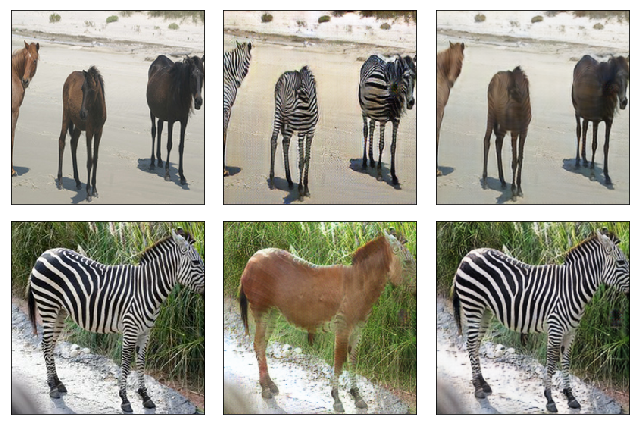

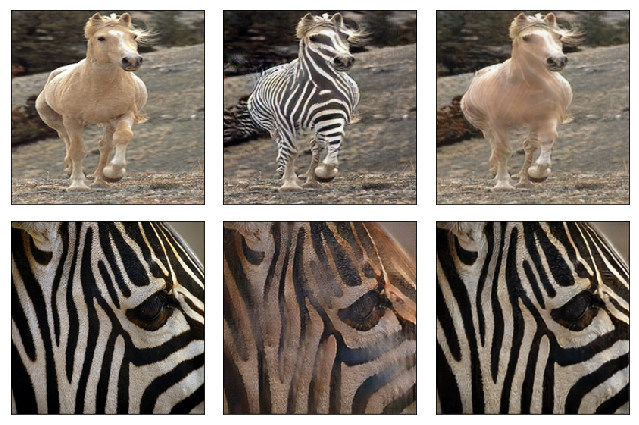

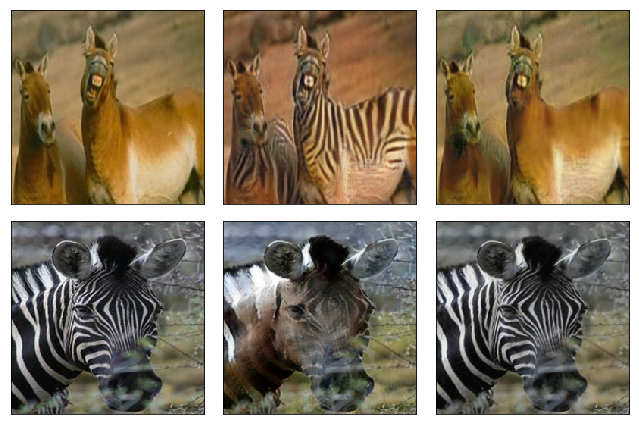

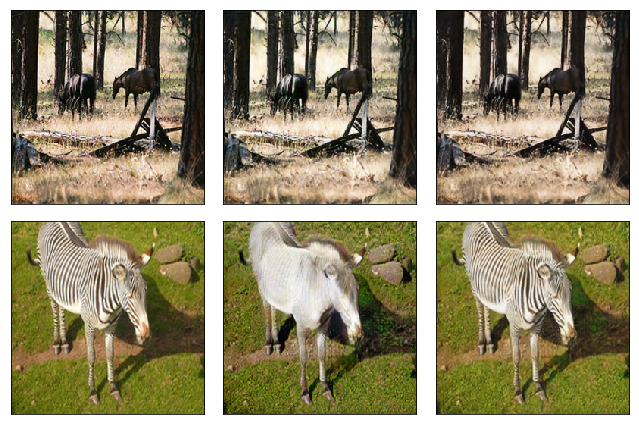

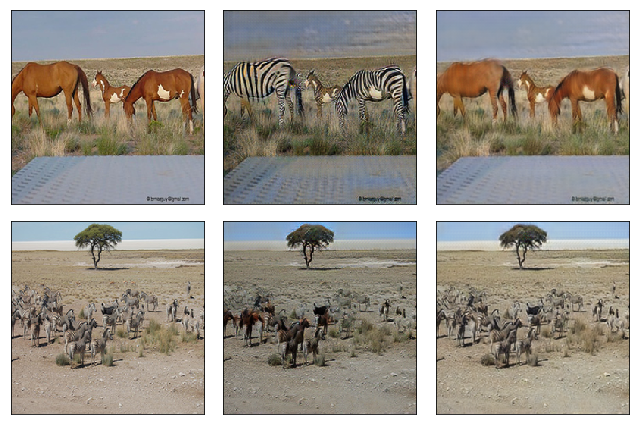

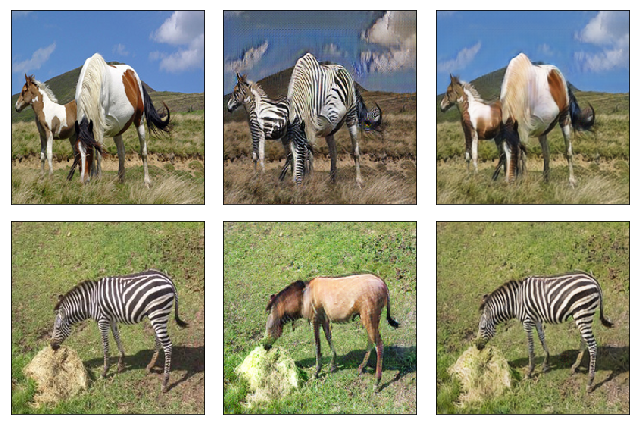

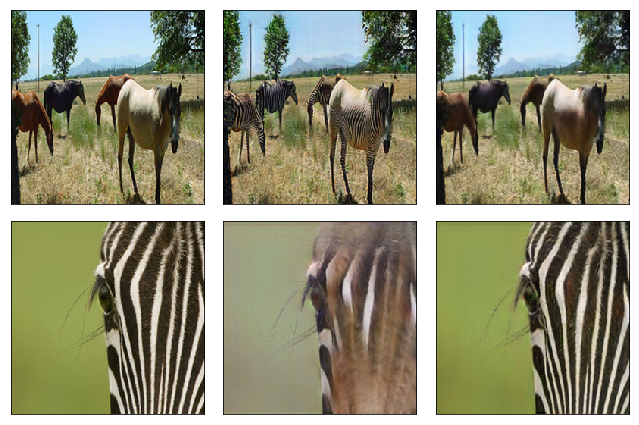

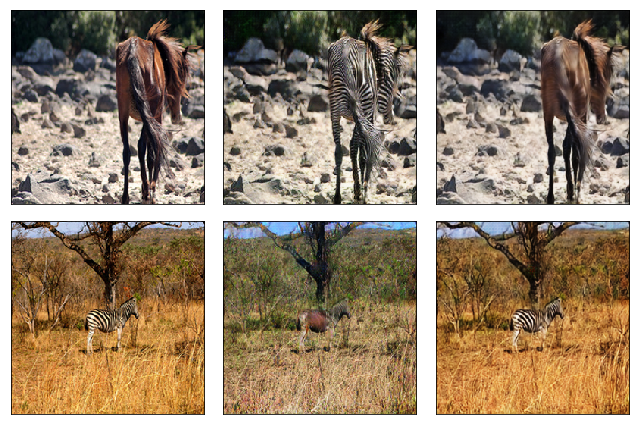

In [0]:
for i in range(8): show_grid(test_ims[i])

In [0]:
#! wget https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip

## fin